In [3]:
!pip install lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 29.0 MB/s eta 0:00:00


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.optim import Adam
from torch.distributions.uniform import Uniform
from torch.utils.data import TensorDataset, DataLoader

import lightning as L

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Words to Embedding
   - Josh is Great.
   - ksi is Great.

In [ ]:
#One hot Encoding for words../ Inputs/outputs
#Trining Data
inputs = torch.tensor(
    [[1., 0., 0., 0.], # Josh
     [0., 1., 0., 0.], # is
     [0., 0., 1., 0.], # Geat
     [0., 0., 0., 1.]] # Ksi
)
labels = torch.tensor([1, 2, 3, 0])  # Adjusted class indices corresponding to inputs

dataset = TensorDataset(inputs, labels)
dataloader = DataLoader(dataset)

# **Word Emb NN**

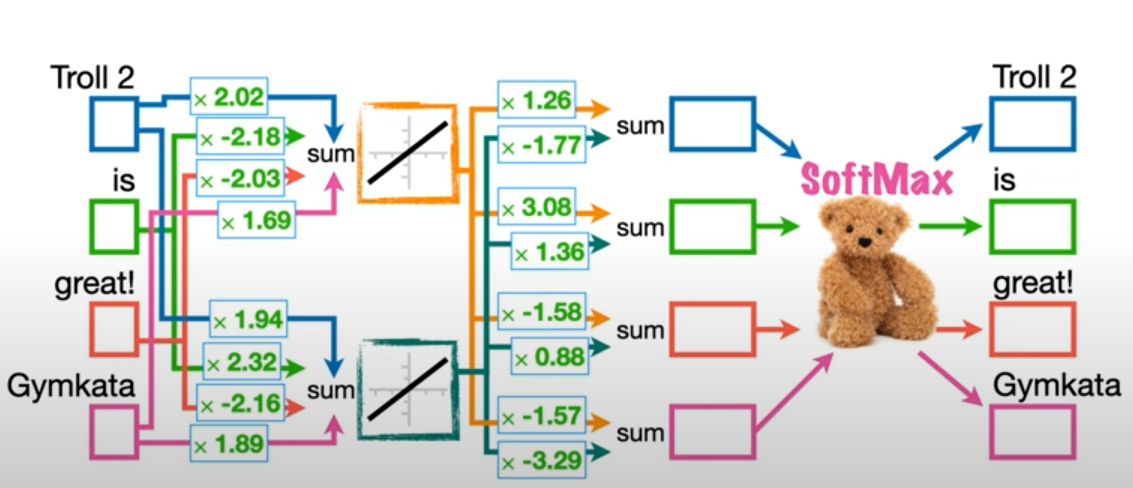

In [ ]:
class WordEmbedding(L.LightningModule):
    def __init__(self):
        super().__init__()

        # init Weights Using Uniform Distribution --> -0.5, 0,5
        minVal, maxVal = -0.5, 0.5

        # Each Word has 2 weights / emb
        # init Weights associate with inputs
        self.input1_w1 = nn.Parameter(Uniform(minVal, maxVal).sample())
        self.input1_w2 = nn.Parameter(Uniform(minVal, maxVal).sample())

        self.input2_w1 = nn.Parameter(Uniform(minVal, maxVal).sample())
        self.input2_w2 = nn.Parameter(Uniform(minVal, maxVal).sample())

        self.input3_w1 = nn.Parameter(Uniform(minVal, maxVal).sample())
        self.input3_w2 = nn.Parameter(Uniform(minVal, maxVal).sample())

        self.input4_w1 = nn.Parameter(Uniform(minVal, maxVal).sample())
        self.input4_w2 = nn.Parameter(Uniform(minVal, maxVal).sample())


        # init Weights associate with output
        self.output1_w1 = nn.Parameter(Uniform(minVal, maxVal).sample())
        self.output1_w2 = nn.Parameter(Uniform(minVal, maxVal).sample())

        self.output2_w1 = nn.Parameter(Uniform(minVal, maxVal).sample())
        self.output2_w2 = nn.Parameter(Uniform(minVal, maxVal).sample())

        self.output3_w1 = nn.Parameter(Uniform(minVal, maxVal).sample())
        self.output3_w2 = nn.Parameter(Uniform(minVal, maxVal).sample())

        self.output4_w1 = nn.Parameter(Uniform(minVal, maxVal).sample())
        self.output4_w2 = nn.Parameter(Uniform(minVal, maxVal).sample())

        #loss
        self.loss = nn.CrossEntropyLoss()

    def forward(self, input):
        input = input.squeeze()
        inputsToTopHidden = ((
            input[0] * self.input1_w1 +
            input[1] * self.input2_w1 +
            input[2] * self.input3_w1 +
            input[3] * self.input4_w1
        ))

        inputsToBottomHidden = ((
            input[0] * self.input1_w2 +
            input[1] * self.input2_w2 +
            input[2] * self.input3_w2 +
            input[3] * self.input4_w2
        ))

        output1 = ((
            inputsToTopHidden * self.output1_w1 +
            inputsToBottomHidden * self.output1_w2
        ))

        output2 = ((
            inputsToTopHidden * self.output2_w1 +
            inputsToBottomHidden * self.output2_w2
        ))

        output3 = ((
            inputsToTopHidden * self.output3_w1 +
            inputsToBottomHidden * self.output3_w2
        ))

        output4 = ((
            inputsToTopHidden * self.output4_w1 +
            inputsToBottomHidden * self.output4_w2
        ))

        outputPreSoftMax = torch.stack([output1, output2, output3, output4])

        return outputPreSoftMax

    def configure_optimizers(self):
        return Adam(self.parameters(), lr=0.1)


    def training_step(self, batch, batch_idx):
        input_i, label_i = batch
        output_i = self.forward(input_i)
        loss = self.loss(output_i, label_i[0])
        return loss



In [ ]:
model = WordEmbedding()
data = {
    'W1':[
        model.input1_w1.item(),
        model.input2_w1.item(),
        model.input3_w1.item(),
        model.input4_w1.item(),
    ],
    'W2':[
        model.input1_w2.item(),
        model.input1_w2.item(),
        model.input1_w2.item(),
        model.input1_w2.item(),
    ],
    'token':['Josh', 'is', 'Great', 'KSI'],
    'input':['input1', 'input2', 'input3', 'input4'],
}

df = pd.DataFrame(data)
df

,W1,W2,token,input
0,0.272265,-0.271235,Josh,input1
1,0.084283,-0.271235,is,input2
2,-0.092885,-0.271235,Great,input3
3,0.238852,-0.271235,KSI,input4


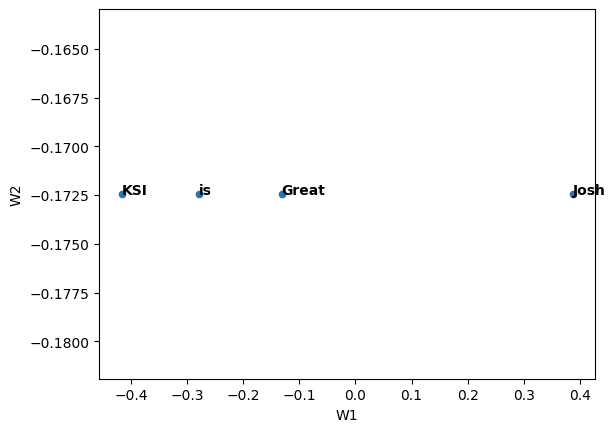

In [ ]:
sns.scatterplot(data=df, x='W1', y='W2')
plt.text(
    df.W1[0], df.W2[0], df.token[0],
    horizontalalignment='left',
    size='medium',
    color='black',
    weight='semibold'
)
plt.text(
    df.W1[1], df.W2[1], df.token[1],
    horizontalalignment='left',
    size='medium',
    color='black',
    weight='semibold'
)
plt.text(
    df.W1[2], df.W2[2], df.token[2],
    horizontalalignment='left',
    size='medium',
    color='black',
    weight='semibold'
)
plt.text(
    df.W1[3], df.W2[3], df.token[3],
    horizontalalignment='left',
    size='medium',
    color='black',
    weight='semibold'
)
plt.show()

# Before Training

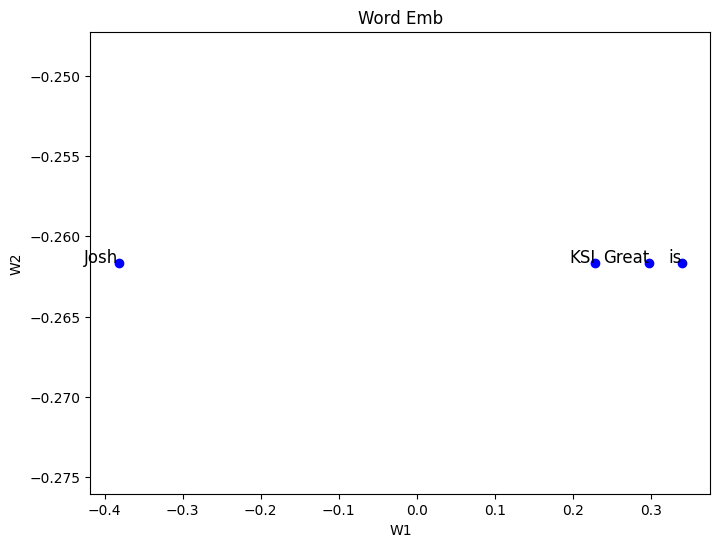

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['W1'], data['W2'], color='blue')

for i, token in enumerate(data['token']):
    plt.text(data['W1'][i], data['W2'][i], token, fontsize=12, ha='right')

plt.xlabel('W1')
plt.ylabel('W2')
plt.title('Word Embeding')
plt.grid(False)
plt.show()

In [ ]:
model = WordEmbedding()
trainer = L.Trainer(max_epochs=100)
trainer.fit(model, train_dataloaders=dataloader)


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name         | Type             | Params | Mode 
----------------------------------------------------------
0 | loss         | CrossEntropyLoss | 0      | train
  | other params | n/a              | 16     | n/a  
----------------------------------------------------------
16        Trainable params
0         Non-trainable params
16        Total params
0.000     Total estimated model params size (MB)
1         Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name         | Type             | Params | Mode 
-----------------------------------------------------

Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=100` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


# After Training

  * Ksi and Josh are in similar Embedding

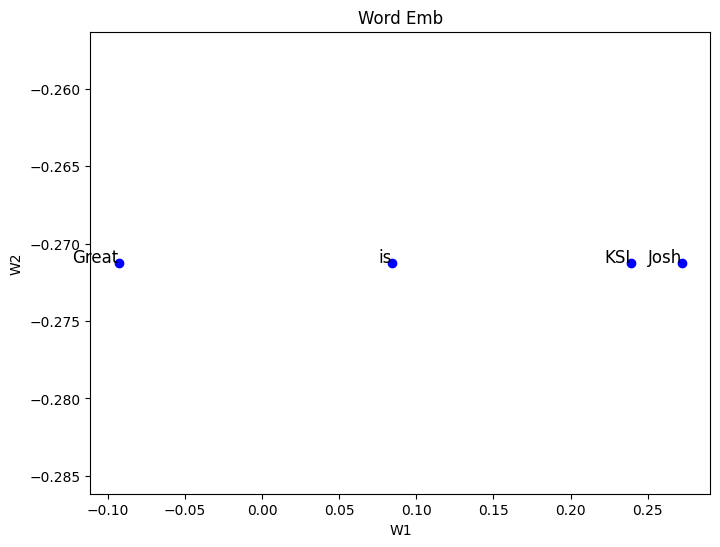

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['W1'], data['W2'], color='blue')

for i, token in enumerate(data['token']):
    plt.text(data['W1'][i], data['W2'][i], token, fontsize=12, ha='right')

plt.xlabel('W1')
plt.ylabel('W2')
plt.title('Word Emb')
plt.grid(False)
plt.show()

# Predictiing
  + input:-- Josh = [1., 0., 0., 0.]
  + output:-- is = [0., 1., 0., 0.]

In [ ]:
model = WordEmbedding()
softmx = nn.Softmax(dim=0)
print(torch.round(softmx(model(torch.tensor([[1., 0., 0., 0.]]))), decimals=2)) # Josh

tensor([0.2700, 0.2500, 0.2500, 0.2400], grad_fn=<RoundBackward1>)


# **NN using Pytorch Linear**

In [12]:

# Define inputs and class indices for labels
inputs = torch.tensor(
    [[1., 0., 0., 0.],  # Josh
     [0., 1., 0., 0.],  # is
     [0., 0., 1., 0.],  # Great
     [0., 0., 0., 1.]]  # Ksi
)

# Use class indices instead of one-hot encoding for labels
labels = torch.tensor([1, 2, 3, 0])  # Corresponding class indices

dataset = TensorDataset(inputs, labels)
dataloader = DataLoader(dataset, batch_size=2)


In [13]:
class WordEmbWithLinear(L.LightningModule):
    def __init__(self):
        super().__init__()

        # Define the layers
        self.inputToHidden = nn.Linear(in_features=4, out_features=2, bias=False)
        self.hiddenToOutput = nn.Linear(in_features=2, out_features=4, bias=False)

        #loss
        self.loss = nn.CrossEntropyLoss()

    def forward(self, input):
        hidden = self.inputToHidden(input)
        outputVal = self.hiddenToOutput(hidden)
        return outputVal

    def configure_optimizers(self):
        return Adam(self.parameters(), lr=0.1)

    def training_step(self, batch, batch_idx):
        input_i, label_i = batch
        output_i = self.forward(input_i)

        # Calculate loss using CrossEntropyLoss
        loss = self.loss(output_i, label_i)  # label_i should be class indices
        return loss


In [14]:
modelLinear = WordEmbWithLinear()
data = {
    'W1':modelLinear.inputToHidden.weight.detach()[0].numpy(),
    'W2':modelLinear.inputToHidden.weight.detach()[1].numpy(),
    'token':['Josh', 'is', 'Great', 'KSI'],
    'input':['input1', 'input2', 'input3', 'input4']
}

df = pd.DataFrame(data)
df

,W1,W2,token,input
0,-0.281246,-0.295157,Josh,input1
1,-0.368514,0.107403,is,input2
2,-0.497027,-0.266457,Great,input3
3,-0.367953,0.319530,KSI,input4


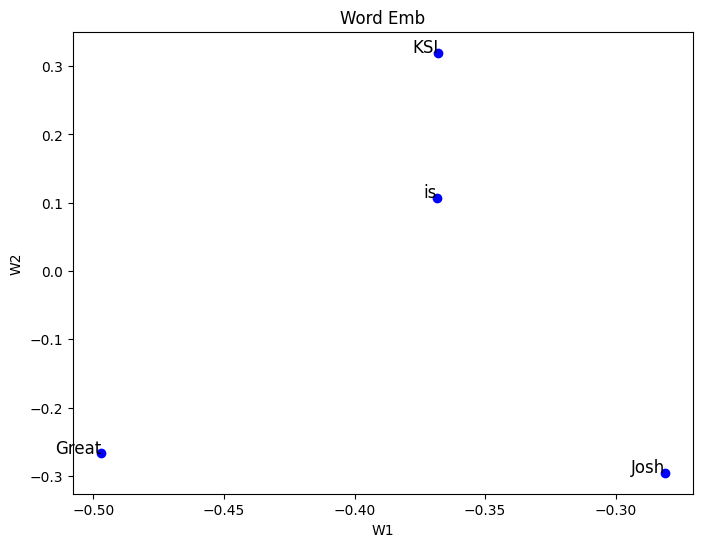

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(data['W1'], data['W2'], color='blue')

for i, token in enumerate(data['token']):
    plt.text(data['W1'][i], data['W2'][i], token, fontsize=12, ha='right')

plt.xlabel('W1')
plt.ylabel('W2')
plt.title('Word Emb')
plt.grid(False)
plt.show()

# Train

In [19]:
modelLinear = WordEmbWithLinear()
trainer = L.Trainer(max_epochs=100)
trainer.fit(modelLinear, train_dataloaders=dataloader)




INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | inputToHidden  | Linear           | 8      | train
1 | hiddenToOutput | Linear           | 8      | train
2 | loss           | CrossEntropyLoss | 0      | train
------------------------------------------------------------
16        Trainable params
0         Non-trainable params
16        Total params
0.000     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name           | Type             | P

Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=100` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


#  After Train

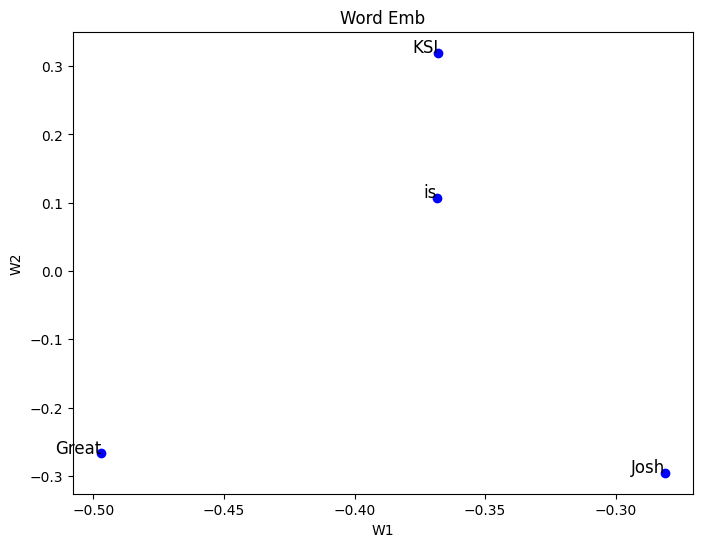

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(data['W1'], data['W2'], color='blue')

for i, token in enumerate(data['token']):
    plt.text(data['W1'][i], data['W2'][i], token, fontsize=12, ha='right')

plt.xlabel('W1')
plt.ylabel('W2')
plt.title('Word Emb')
plt.grid(False)
plt.show()

# **Using nn.Embedding**

In [21]:
modelLinear.inputToHidden.weight
# So nn.emdedding Dont like these row data,, it's need Column Data
# SO we use .T transpose to convert rows into colunn

Parameter containing:
tensor([[-2.4188,  1.8722, -2.4998,  2.0818],
        [-2.0162,  2.1552,  1.8587, -1.9993]], requires_grad=True)

In [22]:
wordEmb = nn.Embedding.from_pretrained(modelLinear.inputToHidden.weight.T)
wordEmb.weight

Parameter containing:
tensor([[-2.4188, -2.0162],
        [ 1.8722,  2.1552],
        [-2.4998,  1.8587],
        [ 2.0818, -1.9993]])

In [23]:
wordEmb(torch.tensor(0))

tensor([-2.4188, -2.0162])

In [24]:
vocab = {
    'Josh':0,
    'is':1,
    'Great':2,
    'KSI':3
}
wordEmb(torch.tensor(vocab['Josh']))

tensor([-2.4188, -2.0162])

# Next Transformer